## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

### Q1.

**1.1)**
   Regression predicts a numeric or continuous value (e.g., sales or temperature) where classification models predict which values are most likely when the outcome is categorical (e.g., vehicle category or different types of animals).

**1.2)**
A confusion tabl is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class (or vice versa). It helps in understanding a model's performance by showing where the classification model made correct predictions (True Positives, True Negatives) and where it made incorrect predictions (False Positives, False Negatives). From this, metrics like accuracy, precision, recall, and F1-score can be derived, providing a detailed view.

**1.3)**
    SSE (Sum of Squared Errors) quantifies the total squared difference between the actual observed values and the values predicted by the model. It is a measure of the model's prediction error, particularly common in regression. A lower SSE indicates a better fit of the model to the data.

**1.4)**
    Overfitting occurs when a model learns the training data too well, including its noise and specific patterns, leading to excellent performance on the training data but poor generalization to unseen data compared to underfitting, which occurs when a model is too simple to capture the underlying patterns in the training data, resulting in poor performance on both the training data and unseen data. The model fails to learn the relationships between features and the target variable.

**1.5)**  
Splitting the data into training and testing sets helps us fairly evaluate how well the model works on new, unseen data. The training set is used to build the model, such as choosing the best value of k, while the test set is only used to check how well the model performs. By looking at accuracy or SSE on the test set, we can see how well the model generalizes beyond the data it was trained on. This helps prevent overfitting and makes sure the chosen
k leads to a model that performs well overall.

**1.6)**  Reporting a class label as a prediction is simple and easy to understand because it gives one clear answer about which class an observation belongs to. However, this approach does not show how confident the model is, which can be misleading if the model is uncertain. On the other hand, reporting a probability distribution over class labels provides more information by showing how confident the model is in each possible class. This can be useful for making more informed decisions, especially when different types of errors have different consequences. The downside is that probability outputs can be harder to interpret and usually require an extra step to decide on a final class label, and if the probabilities are not well-calibrated, they may not accurately represent true confidence.


**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [8]:
import pandas as pd
# Q. 2.1
# 1. Load the dataset
file_path = './data/USA_cars_datasets.csv'


# 2. Keep only the specified columns
df = df[['price', 'year', 'mileage']]
print("\nDataFrame after selecting columns:")
print(df.head())

# 3. Check for NA's
nas_before = df.isnull().sum()
print(f"\nNA values before handling:\n{nas_before}")

# 4. Handle NA's: Dropping rows with any NA values
df_cleaned = df.dropna()
print(f"\nNumber of rows before dropping NAs: {df.shape[0]}")
print(f"Number of rows after dropping NAs: {df_cleaned.shape[0]}")

nas_after = df_cleaned.isnull().sum()
print(f"NA values after handling:\n{nas_after}")

# Assign the cleaned DataFrame back to df for consistency
df = df_cleaned.copy()

# 5. Display the first few rows of the cleaned data
print("\nHead of the cleaned DataFrame:")
print(df.head())

# 6. Print the dimensions of the data
print("\nDimensions of the DataFrame (rows, columns):")
print(df.shape)


DataFrame after selecting columns:
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

NA values before handling:
price      0
year       0
mileage    0
dtype: int64

Number of rows before dropping NAs: 2499
Number of rows after dropping NAs: 2499
NA values after handling:
price      0
year       0
mileage    0
dtype: int64

Head of the cleaned DataFrame:
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Dimensions of the DataFrame (rows, columns):
(2499, 3)


In [9]:
# Q. 2.2
# Maxmin normalize 'year' and 'mileage'

# Function for Max-Min Normalization
def max_min_normalize(series):
    min_val = series.min()
    max_val = series.max()
    return (series - min_val) / (max_val - min_val)

# Apply normalization to 'year' and 'mileage'
df['year_normalized'] = max_min_normalize(df['year'])
df['mileage_normalized'] = max_min_normalize(df['mileage'])

print("DataFrame after Max-Min Normalization:")
print(df.head())

DataFrame after Max-Min Normalization:
   price  year  mileage  year_normalized  mileage_normalized
0   6300  2008   274117         0.744681            0.269287
1   2899  2011   190552         0.808511            0.187194
2   5350  2018    39590         0.957447            0.038892
3  25000  2014    64146         0.872340            0.063016
4  27700  2018     6654         0.957447            0.006537


In [10]:
# Q. 2.3
# Split the sample into ~80% for training and ~20% for evaluation.

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['year_normalized', 'mileage_normalized']]
y = df['price']

# Split the data with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print("\nFirst 5 rows of X_train:")
print(X_train.head())
print("\nFirst 5 rows of y_train:")
print(y_train.head())

Training set size: 1999 samples
Test set size: 500 samples

First 5 rows of X_train:
      year_normalized  mileage_normalized
109          0.957447            0.048624
2296         0.957447            0.053728
354          0.765957            0.177186
266          0.978723            0.015502
2102         0.957447            0.068256

First 5 rows of y_train:
109     23100
2296     8000
354         0
266     17100
2102    16300
Name: price, dtype: int64


k = 3: Mean Squared Error (MSE) = 148065935.52
k = 10: Mean Squared Error (MSE) = 117399126.11
k = 25: Mean Squared Error (MSE) = 112576160.82
k = 50: Mean Squared Error (MSE) = 110202549.30
k = 100: Mean Squared Error (MSE) = 112253932.82
k = 300: Mean Squared Error (MSE) = 114496301.83


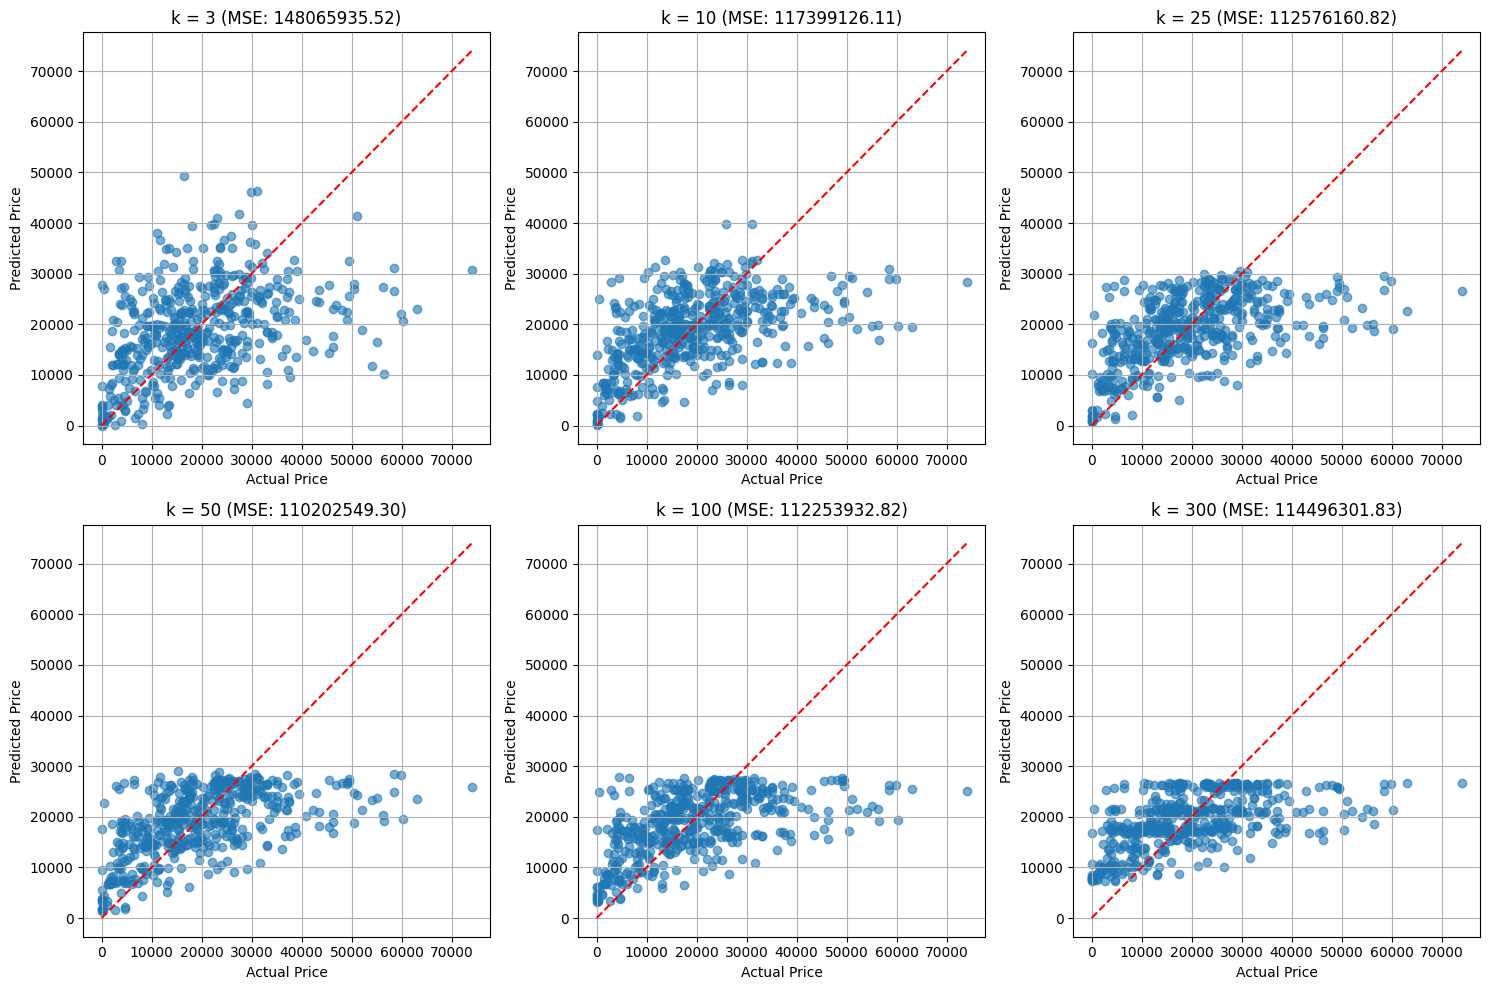


Summary of MSE results:
k = 3: MSE = 148065935.52
k = 10: MSE = 117399126.11
k = 25: MSE = 112576160.82
k = 50: MSE = 110202549.30
k = 100: MSE = 112253932.82
k = 300: MSE = 114496301.83

Based on the results, k=50 had the lowest Mean Squared Error, making it the best choice among the tested values.
Smaller k values showed more scatter around the diagonal in the plots, indicating higher variance and overfitting due to sensitivity to individual data points.
As k increased to intermediate values, the points moved closer to the diagonal, showing better generalization and lower error.
For very large k values, the predictions became too smooth and less responsive, leading to underfitting and higher bias.
Overall, k=50 provides the best balance between bias and variance.)



In [13]:
#Q. 2.4
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Values of k to test
k_values = [3, 10, 25, 50, 100, 300]

# Store MSE values for analysis
mse_results = {}

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Initialize and train the k-NN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_regressor.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse
    print(f"k = {k}: Mean Squared Error (MSE) = {mse:.2f}")

    # Create scatterplot for actual vs. predicted values
    plt.subplot(2, 3, i + 1) # Arrange plots in a 2x3 grid
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line
    plt.title(f'k = {k} (MSE: {mse:.2f})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.grid(True)

plt.tight_layout()
plt.show()

print("\nSummary of MSE results:")
for k, mse in mse_results.items():
    print(f"k = {k}: MSE = {mse:.2f}")

# Q. 2.5 & 2.6 Analysis
print('''
Based on the results, k=50 had the lowest Mean Squared Error, making it the best choice among the tested values.
Smaller k values showed more scatter around the diagonal in the plots, indicating higher variance and overfitting due to sensitivity to individual data points.
As k increased to intermediate values, the points moved closer to the diagonal, showing better generalization and lower error.
For very large k values, the predictions became too smooth and less responsive, leading to underfitting and higher bias.
Overall, k=50 provides the best balance between bias and variance.)
''')

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [42]:
# Q3.1
import pandas as pd
import numpy as np

#Load the dataset using a try-except block
file_path = '/content/data/zoo.csv'

# Preview data
print("\nHead of the DataFrame:")
df_zoo.head()

# Class sizes
print("\nClass distribution (counts):")
class_counts = df_zoo["class"].value_counts().sort_index()
print(class_counts)

# Animals in each class
print("\nAnimals in each class:")
for c in sorted(df_zoo["class"].unique()):
    print(f"\nClass {c}:")
    print(df_zoo.loc[df_zoo["class"] == c, "animal"].values)

# Drop label + animal name to get features
features = df_zoo.drop(columns=["class", "animal"])

# Summary stats for features
print("\nSummary statistics for features:")
features.describe()



Head of the DataFrame:

Class distribution (counts):
class
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: count, dtype: int64

Animals in each class:

Class 1:
['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']

Class 2:
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']

Class 3:
['pitviper' 'seasnake' 'slowworm' 'tortoise' 'tuatara']

Class 4:
['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']

Class 5:
['frog' 'frog' 'newt' 'toad']

Class 6:
['flea' 'gnat' 'honeybee

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [41]:
#Q.3.2
from sklearn.model_selection import train_test_split

# Define features (X) by dropping 'animal' and 'class' columns
X = df_zoo.drop(['animal', 'class'], axis=1)

# Define the target variable (y) as the 'class' column
y = df_zoo['class']

# Split the data into training and testing sets with a 50/50 ratio
# Using stratify=y to maintain class distribution in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nClass distribution in Training set:")
print(y_train.value_counts().sort_index())
print("\nClass distribution in Test set:")
print(y_test.value_counts().sort_index())

Shape of X_train: (50, 16)
Shape of X_test: (51, 16)
Shape of y_train: (50,)
Shape of y_test: (51,)

Class distribution in Training set:
class
1    20
2    10
3     3
4     6
5     2
6     4
7     5
Name: count, dtype: int64

Class distribution in Test set:
class
1    21
2    10
3     2
4     7
5     2
6     4
7     5
Name: count, dtype: int64


--- Evaluating k-NN models for different k values ---
k = 1: Accuracy = 0.9608
k = 2: Accuracy = 0.9608
k = 3: Accuracy = 0.9608
k = 4: Accuracy = 0.8824
k = 5: Accuracy = 0.8431
k = 6: Accuracy = 0.8235
k = 7: Accuracy = 0.8235
k = 8: Accuracy = 0.8235
k = 9: Accuracy = 0.8235
k = 10: Accuracy = 0.8235
k = 11: Accuracy = 0.8235
k = 12: Accuracy = 0.8235
k = 13: Accuracy = 0.8235
k = 14: Accuracy = 0.7647
k = 15: Accuracy = 0.7451
k = 16: Accuracy = 0.7451
k = 17: Accuracy = 0.7451
k = 18: Accuracy = 0.7451
k = 19: Accuracy = 0.6471
k = 20: Accuracy = 0.6078

Optimal k: 1 with accuracy = 0.9608

Overall Accuracy of Optimal k-NN Model (k=1) on Test Set: 0.9608

Confusion Matrix for Optimal k-NN Model:


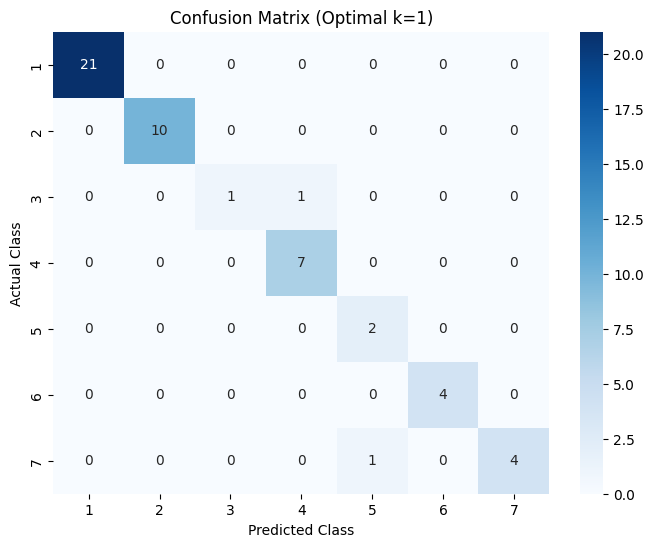


With an overall accuracy of 0.9608, the model performs very well, but there are a few misclassifications.
The model's mistakes are primarily due to the close proximity of characteristics between certain animal classes, especially when only k=1 is considered.
For example, some aquatic reptiles might be mistaken for fish, and some amphibians or invertebrates might share common features like aquatic or eggs which could lead to misclassifications.
 (small datasets limit classification).
 


In [44]:
#Q 3.3 & 3.4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Determine a range of k values to test
k_values = range(1, 21) # Testing k from 1 to 20

# Dictionary to store accuracy for each k
accuracies = {}

print("--- Evaluating k-NN models for different k values ---")
for k in k_values:
    # Instantiate a KNeighborsClassifier with the current k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier using X_train and y_train
    knn_classifier.fit(X_train, y_train)

    #Predict the class labels for X_test
    y_pred = knn_classifier.predict(X_test)

    # Calculate the accuracy score of the predictions against y_test
    accuracy = accuracy_score(y_test, y_pred)

    #Store the accuracy for each k
    accuracies[k] = accuracy
    print(f"k = {k}: Accuracy = {accuracy:.4f}")

# Identify the optimal k value that yields the highest accuracy
optimal_k = max(accuracies, key=accuracies.get)
max_accuracy = accuracies[optimal_k]

print(f"\nOptimal k: {optimal_k} with accuracy = {max_accuracy:.4f}")

# Instantiate a KNeighborsClassifier with the optimal k
optimal_knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)

# Train this optimal classifier using X_train and y_train
optimal_knn_classifier.fit(X_train, y_train)

# predict the class labels for X_test using the optimal classifier
y_pred_optimal = optimal_knn_classifier.predict(X_test)

# print the overall accuracy of the optimal model on the test set
overall_accuracy = accuracy_score(y_test, y_pred_optimal)
print(f"\nOverall Accuracy of Optimal k-NN Model (k={optimal_k}) on Test Set: {overall_accuracy:.4f}")

# Generate and print a confusion matrix for the optimal model
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

print("\nConfusion Matrix for Optimal k-NN Model:")
# Plotting the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.sort(y.unique()), yticklabels=np.sort(y.unique()))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title(f'Confusion Matrix (Optimal k={optimal_k})')
plt.show()

print('''
With an overall accuracy of 0.9608, the model performs very well, but there are a few misclassifications.
The model's mistakes are primarily due to the close proximity of characteristics between certain animal classes, especially when only k=1 is considered.
For example, some aquatic reptiles might be mistaken for fish, and some amphibians or invertebrates might share common features like aquatic or eggs which could lead to misclassifications.
 (small datasets limit classification).
 ''')

--- Building and Evaluating k-NN with subset features ---
Optimal k for subset features: 2 with accuracy = 0.7255

Overall Accuracy of k-NN Model (k=2) on Test Set: 0.7255

Confusion Matrix for k-NN Model with subset features:


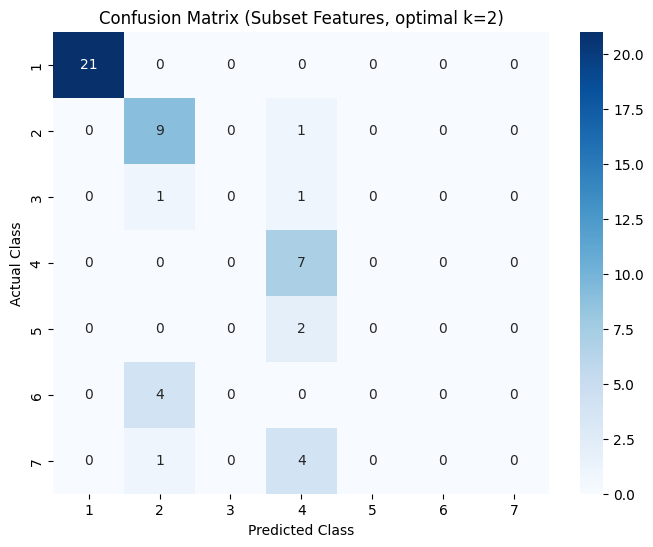


Classes represented in prediction probabilities: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(7)]
Actual unique classes in test set: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]

With only milk, aquatic, and airborne as features, the model's predictive power is limited. It only predicts [1, 2, 3, 4, 7] classes, missing Class 5 (Amphibians) and Class 6 (Reptiles) that are present in the actual test set. 
This occurs because these three features alone don't offer enough unique distinctions for the model to classify amphibians and reptiles effectively -- their characteristics (e.g., milk=0, airborne=0, varying aquatic status) often overlap with other animal groups, making them indistinguishable with this reduced feature set.



In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
#Q. 3.5
#creating a new feature DataFrame X_subset_train and X_subset_test
features_subset = ['milk', 'aquatic', 'airborne']
X_subset_train = X_train[features_subset]
X_subset_test = X_test[features_subset]

print("--- Building and Evaluating k-NN with subset features ---")

k_values_subset = range(1, 21)
accuracies_subset = {}

# Finding optimal k for the subset features
for k in k_values_subset:
    knn_subset = KNeighborsClassifier(n_neighbors=k)
    knn_subset.fit(X_subset_train, y_train)
    y_pred_subset_k = knn_subset.predict(X_subset_test)
    accuracies_subset[k] = accuracy_score(y_test, y_pred_subset_k)

optimal_k_subset = max(accuracies_subset, key=accuracies_subset.get)
print(f"Optimal k for subset features: {optimal_k_subset} with accuracy = {accuracies_subset[optimal_k_subset]:.4f}")

# Train final model with optimal k
final_knn_subset_classifier = KNeighborsClassifier(n_neighbors=optimal_k_subset)
final_knn_subset_classifier.fit(X_subset_train, y_train)
y_pred_subset = final_knn_subset_classifier.predict(X_subset_test)

# Overall Accuracy
overall_accuracy_subset = accuracy_score(y_test, y_pred_subset)
print(f"\nOverall Accuracy of k-NN Model (k={optimal_k_subset}) on Test Set: {overall_accuracy_subset:.4f}")

# Confusion Matrix
conf_matrix_subset = confusion_matrix(y_test, y_pred_subset)
print("\nConfusion Matrix for k-NN Model with subset features:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_subset, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.sort(y.unique()), yticklabels=np.sort(y.unique()))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title(f'Confusion Matrix (Subset Features, optimal k={optimal_k_subset})')
plt.show()

# Predict probabilities
y_proba_subset = final_knn_subset_classifier.predict_proba(X_subset_test)
class_labels = sorted(y.unique())

# Analyze represented classes in predictions
predicted_classes_with_proba = [class_labels[i] for i, col_sum in enumerate(y_proba_subset.sum(axis=0)) if col_sum > 0]
actual_classes_in_test = sorted(y_test.unique())

print(f"\nClasses represented in prediction probabilities: {sorted(predicted_classes_with_proba)}")
print(f"Actual unique classes in test set: {actual_classes_in_test}")


print('''
With only milk, aquatic, and airborne as features, the model's predictive power is limited. It only predicts [1, 2, 3, 4, 7] classes, missing Class 5 (Amphibians) and Class 6 (Reptiles) that are present in the actual test set.
This occurs because these three features alone don't offer enough unique distinctions for the model to classify amphibians and reptiles effectively -- their characteristics (e.g., milk=0, airborne=0, varying aquatic status) often overlap with other animal groups, making them indistinguishable with this reduced feature set.
''')

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def custom_kde(data, kernel="gaussian", bandwidth=None, num_points=200):
    """
    Simple custom KDE function using NumPy broadcasting.
    """

    # Convert input to NumPy array
    x = np.asarray(data)
    n = len(x)

    # Silverman's rule if bandwidth not provided
    if bandwidth is None:
        bandwidth = 1.06 * np.std(x, ddof=1) * n ** (-1/5)

    # Evaluation grid
    grid = np.linspace(x.min() - 3*bandwidth,
                       x.max() + 3*bandwidth,
                       num_points)

    # Compute scaled distances
    z = (grid[:, None] - x[None, :]) / bandwidth

    # Kernel functions
    if kernel == "gaussian":
        K = (1 / np.sqrt(2*np.pi)) * np.exp(-0.5 * z**2)
    elif kernel == "uniform":
        K = 0.5 * (np.abs(z) <= 1)
    elif kernel == "epanechnikov":
        K = 0.75 * (1 - z**2) * (np.abs(z) <= 1)
    else:
        raise ValueError("Kernel must be gaussian, uniform, or epanechnikov")

    # KDE estimate
    density = K.sum(axis=1) / (n * bandwidth)

    return grid, density



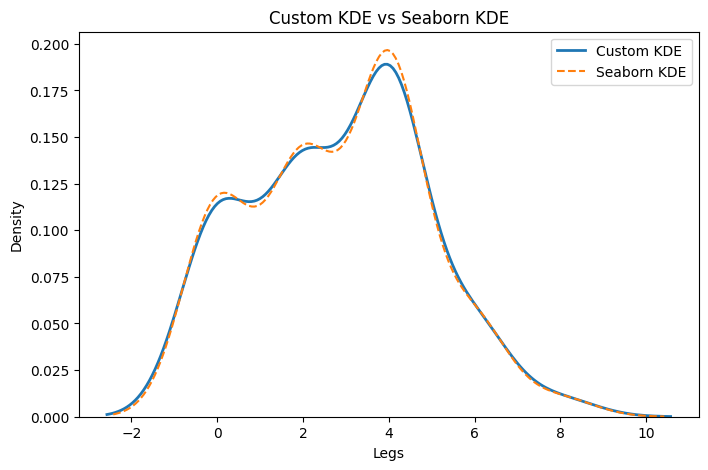

In [52]:
import seaborn as sns
import pandas as pd

# Example dataset from class
data = df_zoo["legs"]

# Custom KDE
x_grid, dens = custom_kde(data, kernel="gaussian")

plt.figure(figsize=(8, 5))
plt.plot(x_grid, dens, label="Custom KDE", linewidth=2)

# Seaborn KDE
sns.kdeplot(data, linestyle="--", label="Seaborn KDE")

plt.xlabel("Legs")
plt.ylabel("Density")
plt.title("Custom KDE vs Seaborn KDE")
plt.legend()
plt.show()

plt.show()